# CS 316 : Introduction to Deep Learning
## Lab 03 : Calculus & Probability
### Dr. Abdul Samad

# Overview

Hello, students. This lab will cover the fundamentals of calculus and probability with a focus on Deep Learning-related concepts. The goal of this lab is to teach students how to use calculus and probability in Python.

# Setup

In [2]:
# Import numpy using the alias np
import numpy as np
print(np.__version__)
# Import matplotlib.pyplot using the plt
import matplotlib.pyplot as plt
from scipy import stats


1.26.4


# Calculus

## Derivatives

We begin by addressing the calculation of derivatives, a crucial step in nearly all deep learning optimization algorithms.
In deep learning, we typically choose loss functions that are differentiable with respect to our model's parameters.
Put simply, this means that for each parameter, we can determine how rapidly the loss would increase or decrease,
were we to *increase* or *decrease* that parameter by an infinitesimally small amount.

Suppose that we have a function $f: \mathbb{R} \rightarrow \mathbb{R}$, whose input and output are both scalars.
The *derivative* of $f$ is defined as


$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h} $$


if this limit exists.
If $f'(a)$ exists, $f$ is said to be *differentiable* at $a$.
If $f$ is differentiable at every number of an interval, then this function is differentiable on this interval.
We can interpret the derivative $f'(x)$ as the *instantaneous* rate of change of $f(x)$ with respect to $x$.
The so-called instantaneous rate of change is based on the variation $h$ in $x$, which approaches $0$.




To illustrate derivatives, let us experiment with an example. Define $u = f(x) = 3x^2-4x$

In [3]:
def f(x):
    return 3 * x ** 2 - 4 * x

By setting $x=1$ and letting $h$ approach $0$, the numerical result of $\frac{f(x+h) - f(x)}{h}$ approaches $2$.
Though this experiment is not a mathematical proof, we will see later that the derivative $u'$ is $2$ when $x=1$.


In [4]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


## Scalar Differentiation

Let us familiarize ourselves with a few equivalent notations for derivatives.
Given $y = f(x)$, where $x$ and $y$ are the independent variable and the dependent variable of the function $f$, respectively. The following expressions are equivalent:

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

where symbols $\frac{d}{dx}$ and $D$ are *differentiation operators* that indicate operation of *differentiation*.


We can use the following rules to differentiate common functions:

* $DC = 0$ ($C$ is a constant),
* $Dx^n = nx^{n-1}$ (the *power rule*, $n$ is any real number),
* $De^x = e^x$,
* $D\ln(x) = 1/x.$

To differentiate a function that is formed from a few simpler functions such as the above common functions,
the following rules can be handy for us.
Suppose that functions $f$ and $g$ are both differentiable and $C$ is a constant,
we have the *constant multiple rule*

$$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$

the *sum rule*

$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$

the *product rule*

$$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$$

and the *quotient rule*

$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$



Now we can apply a few of the above rules to find $u' = f'(x) = 3 \frac{d}{dx} x^2-4\frac{d}{dx}x = 6x-4$.
Thus, by setting $x = 1$, we have $u' = 2$. This is supported by our earlier experiment in this section
where the numerical result approaches $2$. This derivative is also the slope of the tangent line
to the curve $u = f(x)$ when $x = 1$.




To visualize such an interpretation of derivatives, we will use `matplotlib`,  a popular plotting library in Python. The plot of  the function $u = f(x)$ and its tangent line $y = 2x - 3$ at $x=1$, where the coefficient $2$ is the slope of the tangent line can be seen in the figure below.

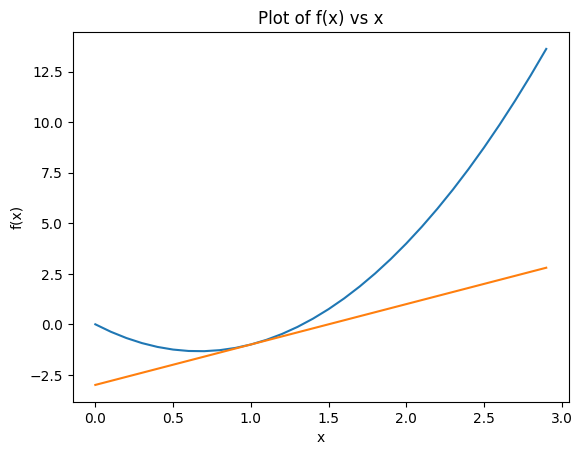

In [5]:
x = np.arange(0, 3, 0.1)
plt.plot(x,f(x))
plt.plot(x,2*x-3)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Plot of f(x) vs x')
plt.show()

## Partial Derivatives



So far we have dealt with the differentiation of functions of just one variable.
In deep learning, functions often depend on *many* variables.
Thus, we need to extend the ideas of differentiation to these *multivariate* functions.


Let $y = f(x_1, x_2, \ldots, x_n)$ be a function with $n$ variables. The *partial derivative* of $y$ with respect to its $i^\mathrm{th}$  parameter $x_i$ is

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$


To calculate $\frac{\partial y}{\partial x_i}$, we can simply treat $x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$ as constants and calculate the derivative of $y$ with respect to $x_i$.
For notation of partial derivatives, the following are equivalent:

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$



## Gradients



We can concatenate partial derivatives of a multivariate function with respect to all its variables to obtain the *gradient* vector of the function.
Suppose that the input of function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is an $n$-dimensional vector $\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$ and the output is a scalar. The gradient of the function $f(\mathbf{x})$ with respect to $\mathbf{x}$ is a vector of $n$ partial derivatives:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

where $\nabla_{\mathbf{x}} f(\mathbf{x})$ is often replaced by $\nabla f(\mathbf{x})$ when there is no ambiguity.

Let $\mathbf{x}$ be an $n$-dimensional vector, the following rules are often used when differentiating multivariate functions:

* For all $\mathbf{A} \in \mathbb{R}^{m \times n}$, $\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}$,
* For all  $\mathbf{A} \in \mathbb{R}^{n \times m}$, $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}^\top$,
* For all  $\mathbf{A} \in \mathbb{R}^{n \times n}$, $\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$,
* $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}^\top$.

Similarly, for any matrix $\mathbf{X}$, we have $\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}^\top$. As we will see later, gradients are useful for designing optimization algorithms in deep learning.


## Chain Rule




However, such gradients can be hard to find.
This is because multivariate functions in deep learning are often *composite*,
so we may not apply any of the aforementioned rules to differentiate these functions.
Fortunately, the *chain rule* enables us to differentiate composite functions.

Let us first consider functions of a single variable.
Suppose that functions $y=f(u)$ and $u=g(x)$ are both differentiable, then the chain rule states that

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

Now let us turn our attention to a more general scenario
where functions have an arbitrary number of variables.
Suppose that the differentiable function $y$ has variables
$u_1, u_2, \ldots, u_m$, where each differentiable function $u_i$
has variables $x_1, x_2, \ldots, x_n$.
Note that $y$ is a function of $x_1, x_2, \ldots, x_n$.
Then the chain rule gives

$$\frac{dy}{dx_i} = \frac{dy}{du_1} \frac{du_1}{dx_i} + \frac{dy}{du_2} \frac{du_2}{dx_i} + \cdots + \frac{dy}{du_m} \frac{du_m}{dx_i}$$

for any $i = 1, 2, \ldots, n$.

# Probability

Probability is the science of quantifying the unknown. To learn about patterns in data, most machine learning and deep learning algorithms use a large amount of data. When data is used in a system instead than primary logic, uncertainty rises, and as uncertainty grows, probability becomes significant. We apply common sense to a deep learning system by incorporating probability. Otherwise, the system would be exceedingly fragile and useless.

## Foundations of Probability

In class, we defined the main probability concepts. However, in this lab, we will look at how concepts are important in understanding the **hello world** of Deep Learning - MNIST Digit Classification.



<img src="https://miro.medium.com/max/1400/1*nbOBjRK0GqUyXqlNQhEZjw.png" width=400 height=400 />

The MNIST Dataset contains images of hand written digits 0 - 9. Each image is a greyscale image of size 28 x 28. The goal of Deep learning is to classify classify handwritten digits and label them. Let's suppose the neural network to classify these images is as follows. **[You don't need to have an indepth understaning of the neural networks for this lab ]**

<img src="https://miro.medium.com/max/1400/1*E0TXv0DYkOMjTk4tA14osQ.png" width=400 height=400>

The input layer is a vector of size 784 made by flattening the input image of size 28 by 28. The input vector is then sent to the next layer, where it is multiplied by the weights and added to the bias vector. This layer has ten neurons, implying that there are ten digits. This layer's output is fed to the SoftMax function. The SoftMax function returns a vector of length 10, with each element representing a probability value for each digit. The predicted label is the index of the highest-valued element.

**Where's the probability in this?**
- **Sample Space :** The set of all possible values in an experiment. In the preceding example, the input can be from a set of images, therefore it is the sample space for the input. Similarly, the output prediction can take any value from 0 to 9, hence the digits represent the sample space for the output prediction.

- **Random Variable :** A variable that can take different values of the sample space randomly. In the above neural network, the input vector x is a random variable, as is the output prediction. The neural network's weights are likewise random variables since they are initialized random using a probability distribution.
- **Probability Distribution :** The probability distribution is a description of how likely the random variable is to take on different values of the sample space. The neural network's weights are drawn from a probability distribution. The output vector y follows the SoftMax distribution, which is also a probability distribution that represents the likelihood of X assuming various digit values.

## Measures of central tendency and variation

Let's simulate a 1000 rolls of a six sided fair die.

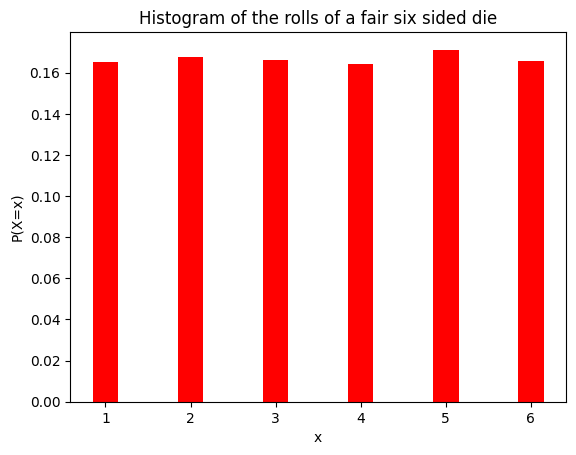

In [6]:
dieRolls = np.random.randint(low=1,high=7,size=70000)
plt.hist(dieRolls,bins=[1,2,3,4,5,6,7], align='left', rwidth=0.3, color='Red',density=True)
plt.xlabel('x')
plt.ylabel('P(X=x)')
plt.title('Histogram of the rolls of a fair six sided die')
plt.show()

As the size (number of samples) increases, the height of the  all rectangles becomes roughly the same i.e. approach the PMF of fair six sided die. Furthermore, the mean, median and variance also approach the actual values.

In [7]:
print(f'Expected Value:- {np.mean(dieRolls)}; Median:- {np.median(dieRolls)}; Variance:- {np.var(dieRolls)}')

Expected Value:- 3.5063285714285715; Median:- 4.0; Variance:- 2.9131313777551027


## Probability Distributions

### Discrete Distributions

#### Discrete Uniform Distribution

Mean : 3.50 , Variance : 2.92 


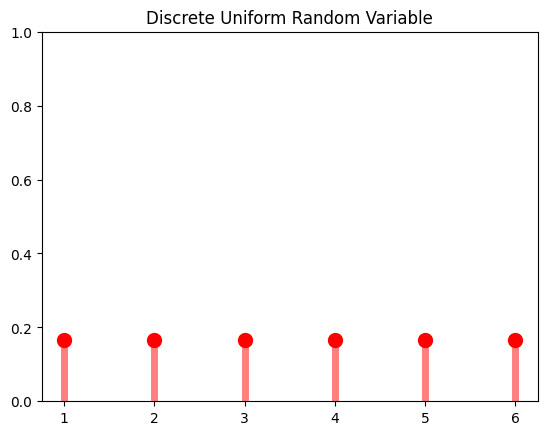

In [8]:
rv = stats.randint(1,7)
mean, var = rv.stats(moments='mv') # Compute Mean and Variance
print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean,v=var))
x = np.arange(1,7)
f = rv.pmf(x)
# Plot PMF
# ms: size of o
plt.plot(x, f, 'ro', ms=10);
# alpha: transparency of the line
# lw: line width
# Plot VLINES
plt.vlines(x, 0, f, colors='r', lw=5, alpha=0.5)
plt.ylim (0,1)
plt.title("Discrete Uniform Random Variable")
plt.show()


#### Bernoulli Distribution

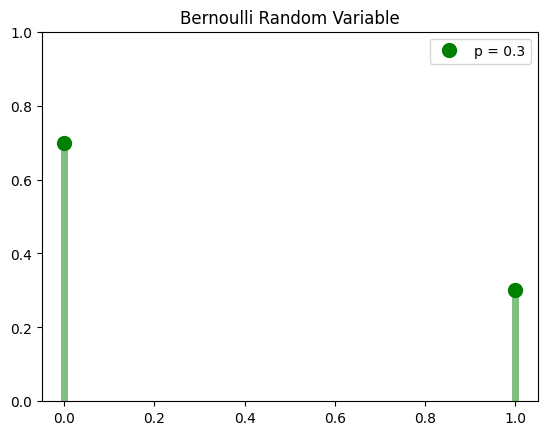

Mean : 0.30 , Variance : 0.21 


In [9]:

p=0.3 # p is the probability of a single success.
rv = stats.bernoulli(p) # Create Bernoulli Random Variable
mean, var = rv.stats(moments='mv') # Compute Mean and Variance
x = np.arange(2)
f = rv.pmf(x)
# Plot PMF
# ms: size of o
plt.plot(x, f, 'go', ms=10);
# alpha: transparency of the line
# lw: line width
# Plot VLINES
plt.vlines(x, 0, f, colors='g', lw=5, alpha=0.5)
plt.ylim (0,1)
plt.legend(labels = ["p = {v}".format(v=p)])
plt.title("Bernoulli Random Variable")
plt.show()
print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean,v=var))



#### Binomial Random Variable

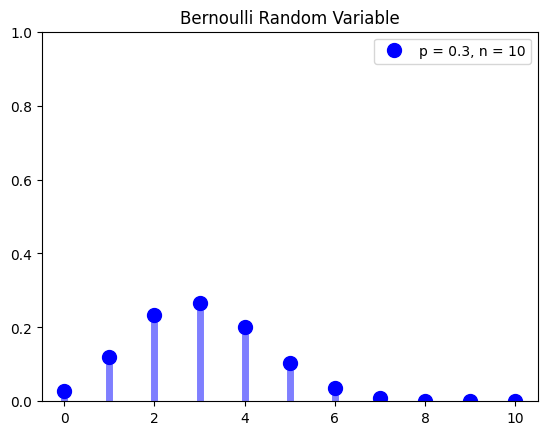

Mean : 3.00 , Variance : 2.10 


In [10]:

p = 0.3
# p is the probability of a single success.
rv = stats.binom(p=0.3,n=10) # Create Bernoulli Random Variable
mean, var = rv.stats(moments='mv') # Compute Mean and Variance
x = np.arange(11)
f = rv.pmf(x)
# Plot PMF
# ms: size of o
plt.plot(x, f,'bo', ms=10);
# alpha: transparency of the line
# lw: line width
# Plot VLINES
plt.vlines(x, 0, f, colors='b', lw=5, alpha=0.5)
plt.ylim (0,1)
plt.legend(labels = ["p = {v}, n = {w}".format(v=p,w=10)])
plt.title("Bernoulli Random Variable")
plt.show()
print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean,v=var))



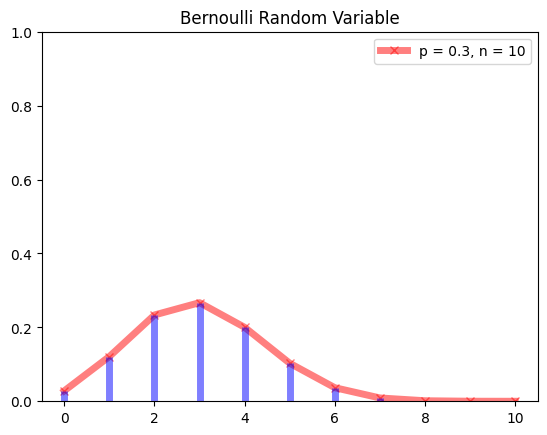

Mean : 3.00 , Variance : 2.10 


In [13]:
rv= stats.binom(p=0.3, n=10)
mean, var = rv.stats(moments = 'mv')
x = np.arange(11)
y = rv.pmf(x)


plt.plot(x,y, color='r', marker='x', lw=5, alpha=0.5)


plt.vlines(x, 0, f, colors='b', lw=5, alpha=0.5)
plt.ylim (0,1)
plt.legend(labels = ["p = {v}, n = {w}".format(v=p,w=10)])
plt.title("Bernoulli Random Variable")
plt.show()
print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean,v=var))


#### Poisson Distribution

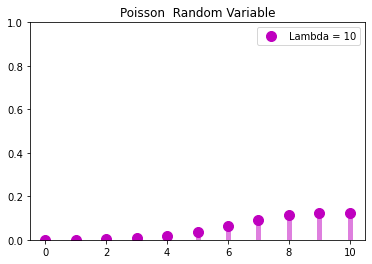

Mean : 10.00 , Variance : 10.00 


In [ ]:
lambd = 10
rv = stats.poisson(lambd) # Create Poisson Random Variable
mean, var = rv.stats(moments='mv') # Compute Mean and Variance
x = np.arange(11)
f = rv.pmf(x)
# Plot PMF
# ms: size of o
plt.plot(x, f, 'mo', ms=10);
# alpha: transparency of the line
# lw: line width
# Plot VLINES
plt.vlines(x, 0, f, colors='m', lw=5, alpha=0.5)
plt.ylim (0,1)
plt.legend(labels = ["Lambda = {v}".format(v=lambd)])
plt.title("Poisson  Random Variable")
plt.show()
print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean,v=var))

### Continous Distribution

#### Continous Uniform Distribution

Mean : 0.00 , Variance : 0.03 


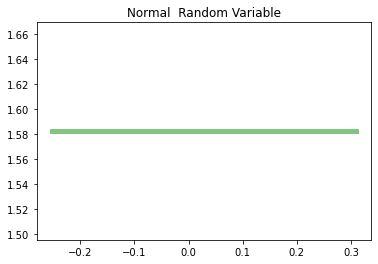

In [ ]:
rv = stats.uniform(loc=-0.316,scale=0.632) # Create Poisson Random Variable
mean, var = rv.stats(moments='mv') # Compute Mean and Variance
print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean,v=var))
x = np.linspace(rv.ppf(0.1),rv.ppf(0.99),100)
f = rv.pdf(x)
plt.plot(x, f, lw=5, alpha=0.6, label='norm pdf',color='tab:green');
#plt.legend(labels = [f'Low: {low}; High: {high}'])
plt.title("Normal  Random Variable")
plt.show()


#### Gaussian Distribution

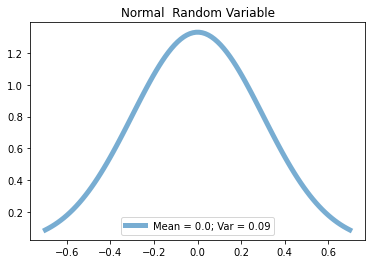

Mean : 0.00 , Variance : 0.09 


In [ ]:
rv = stats.norm(loc=0,scale=0.3) # Create Poisson Random Variable
mean, var = rv.stats(moments='mv') # Compute Mean and Variance
x = np.linspace(rv.ppf(0.01),rv.ppf(0.99),100)
f = rv.pdf(x)
plt.plot(x, f, lw=5, alpha=0.6, label='norm pdf',color='tab:blue');
plt.legend(labels = ["Mean = {v}; Var = {w}".format(v=mean, w=var)])
plt.title("Normal  Random Variable")
plt.show()
print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean,v=var))

#### Exponential Distribution

Mean : 10.00 , Variance : 100.00 


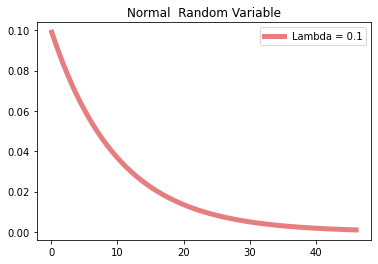

In [ ]:
scale = 10
rv = stats.expon(scale=scale) # Create Poisson Random Variable
mean, var = rv.stats(moments='mv') # Compute Mean and Variance
print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean,v=var))
x = np.linspace(rv.ppf(0.01),rv.ppf(0.99),100)
f = rv.pdf(x)
plt.plot(x, f, lw=5, alpha=0.6, label='norm pdf',color='tab:red');
plt.legend(labels = [f'Lambda = {np.round(1/scale,2)}'])
plt.title("Normal  Random Variable")
plt.show()
